In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
df=pd.read_csv('Downloads/MyLA311_Service_Request_Data_2018.csv')
df.head(10)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,MobileOS,Anonymous,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1262691971,12/31/2018 11:55:30 PM,01/02/2019 10:20:06 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.2473989385, -118.536249101)",500.0,J,5.0,North Valley APC,12.0,Mitchell Englander,113.0,NORTHRIDGE WEST,DEVONSHIRE
1,1-1262694361,12/31/2018 11:53:51 PM,01/04/2019 02:37:07 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.086649927, -118.289288746)",594.0,A,6.0,Central APC,13.0,Mitch O'Farrell,34.0,EAST HOLLYWOOD NC,RAMPART
2,1-1262691941,12/31/2018 11:50:04 PM,01/15/2019 11:11:39 AM,SR Created,OCB,Graffiti Removal,Cancelled,Self Service,NaN,N,...,"(33.9236735356, -118.29186988)",704.0,A,7.0,South Los Angeles APC,15.0,Joe Buscaino,90.0,HARBOR GATEWAY NORTH NC,SOUTHEAST
3,1-1262691921,12/31/2018 11:43:07 PM,01/02/2019 11:10:40 AM,SR Created,BOS,Bulky Items,Closed,Self Service,NaN,N,...,"(34.1191266964, -118.195252969)",595.0,C,1.0,East Los Angeles APC,14.0,Jose Huizar,41.0,HISTORIC HIGHLAND PARK NC,NORTHEAST
4,1-1262694331,12/31/2018 11:40:14 PM,01/02/2019 09:55:16 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.107171697, -118.203784117)",595.0,B,3.0,East Los Angeles APC,1.0,Gilbert Cedillo,41.0,HISTORIC HIGHLAND PARK NC,NORTHEAST
5,1-1262692671,12/31/2018 11:38:38 PM,01/02/2019 10:18:30 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.228022288, -118.541561268)",530.0,H,1.0,North Valley APC,12.0,Mitchell Englander,124.0,NORTHRIDGE SOUTH NC,DEVONSHIRE
6,1-1262691891,12/31/2018 11:38:37 PM,01/02/2019 11:29:02 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.1183343173, -118.190794941)",595.0,C,1.0,East Los Angeles APC,14.0,Jose Huizar,41.0,HISTORIC HIGHLAND PARK NC,NORTHEAST
7,1-1262692651,12/31/2018 11:36:58 PM,01/02/2019 11:22:30 AM,SR Created,OCB,Graffiti Removal,Closed,Self Service,NaN,N,...,"(34.1188625212, -118.193766534)",595.0,C,1.0,East Los Angeles APC,14.0,Jose Huizar,41.0,HISTORIC HIGHLAND PARK NC,NORTHEAST
8,1-1262693411,12/31/2018 11:24:15 PM,01/09/2019 07:21:49 PM,SR Created,BOS,Bulky Items,Closed,Self Service,NaN,N,...,"(34.153139488, -118.413224736)",562.0,E,4.0,South Valley APC,2.0,Paul Krekorian,27.0,STUDIO CITY NC,NORTH HOLLYWOOD
9,1-1262694271,12/31/2018 11:22:40 PM,01/02/2019 12:40:41 PM,SR Created,BOS,Bulky Items,Closed,Call,NaN,N,...,"(34.1940238194, -118.419347703)",532.0,D,5.0,South Valley APC,2.0,Paul Krekorian,22.0,NOHO WEST NC,NORTH HOLLYWOOD


In [143]:
df.shape

(1193982, 33)

In [144]:
df.isnull().mean()*100

SRNumber               0.000000
CreatedDate            0.000000
UpdatedDate            0.000000
ActionTaken            0.000000
Owner                  0.000084
RequestType            0.000000
Status                 0.000000
RequestSource          0.000000
MobileOS              79.608235
Anonymous              0.000000
AssignTo               1.569705
ServiceDate            5.183579
ClosedDate             0.422117
AddressVerified        0.000000
ApproximateAddress    29.103035
Address                0.007622
HouseNumber           18.796515
Direction              6.790890
StreetName            18.796431
Suffix                 8.136722
ZipCode                0.090621
Latitude               2.878435
Longitude              2.878435
Location               2.878435
TBMPage                0.058460
TBMColumn              0.058460
TBMRow                 0.058460
APC                    0.059381
CD                     0.058879
CDMember              13.092911
NC                     1.339970
NCName  

In [145]:
df=df.drop(['MobileOS','SRNumber'], axis=1)

In [146]:
df=df[df.Status != 'Cancelled']

In [147]:
df.dropna(inplace=True)

In [148]:
df['ZipCode']=df['ZipCode'].apply(pd.to_numeric)

In [149]:
df['ZipCode']=df['ZipCode'].replace('.0', '')

In [150]:
df.tail(10)

,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,Anonymous,AssignTo,ServiceDate,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
1193963,01/01/2018 01:50:45 AM,03/20/2018 03:25:20 PM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Y,WV,03/12/2018 12:00:00 AM,...,"(34.2022411582, -118.629321605)",529.0,G,5.0,South Valley APC,12.0,Mitchell Englander,11.0,WEST HILLS NC,TOPANGA
1193967,01/01/2018 01:32:46 AM,01/04/2018 10:51:04 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Y,GAPBH,01/02/2018 10:49:17 AM,...,"(34.034031929, -118.196715179)",635.0,C,6.0,East Los Angeles APC,14.0,Jose Huizar,50.0,BOYLE HEIGHTS NC,HOLLENBECK
1193968,01/01/2018 01:31:14 AM,01/05/2018 08:45:56 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Y,GAPBH,01/02/2018 08:41:54 AM,...,"(34.0339141951, -118.197326775)",635.0,C,6.0,East Los Angeles APC,14.0,Jose Huizar,50.0,BOYLE HEIGHTS NC,HOLLENBECK
1193969,01/01/2018 01:26:30 AM,01/02/2018 01:09:13 PM,SR Created,OCB,Graffiti Removal,Closed,Self Service,N,NEGB_ELA,01/02/2018 01:08:35 PM,...,"(34.0843686726, -118.222055625)",594.0,J,6.0,East Los Angeles APC,1.0,Gilbert Cedillo,102.0,GREATER CYPRESS PARK NC,NORTHEAST
1193970,01/01/2018 01:21:40 AM,01/03/2018 09:14:06 AM,SR Created,BOS,Homeless Encampment,Closed,Self Service,N,NC,01/03/2018 12:00:00 AM,...,"(34.0843686726, -118.222055625)",594.0,J,6.0,East Los Angeles APC,1.0,Gilbert Cedillo,102.0,GREATER CYPRESS PARK NC,NORTHEAST
1193973,01/01/2018 12:50:56 AM,01/06/2018 11:38:48 AM,SR Created,BOS,Bulky Items,Closed,Self Service,N,HB,01/06/2018 12:00:00 AM,...,"(33.7330910057, -118.301362128)",824.0,A,6.0,Harbor APC,15.0,Joe Buscaino,94.0,NORTHWEST SAN PEDRO NC,HARBOR
1193974,01/01/2018 12:45:07 AM,01/05/2018 09:59:11 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,N,NC,01/05/2018 12:00:00 AM,...,"(34.0973504598, -118.306953691)",593.0,H,5.0,Central APC,13.0,Mitch O'Farrell,34.0,EAST HOLLYWOOD NC,HOLLYWOOD
1193978,01/01/2018 12:09:27 AM,01/03/2018 12:52:03 PM,SR Created,BOS,Bulky Items,Closed,Self Service,Y,NC,01/03/2018 12:00:00 AM,...,"(34.1161798055, -118.189859629)",595.0,D,2.0,East Los Angeles APC,1.0,Gilbert Cedillo,41.0,HISTORIC HIGHLAND PARK NC,NORTHEAST
1193979,01/01/2018 12:08:27 AM,01/02/2018 10:10:08 PM,SR Created,BOS,Metal/Household Appliances,Closed,Self Service,N,SLA,01/02/2018 12:00:00 AM,...,"(34.0144994243, -118.345968878)",673.0,D,2.0,South Los Angeles APC,10.0,Herb J. Wesson Jr.,79.0,EMPOWERMENT CONGRESS WEST AREA NDC,SOUTHWEST
1193980,01/01/2018 12:05:43 AM,01/03/2018 12:14:43 PM,SR Created,BOS,Bulky Items,Closed,Self Service,Y,NC,01/03/2018 12:00:00 AM,...,"(34.1162764252, -118.190311778)",595.0,D,2.0,East Los Angeles APC,1.0,Gilbert Cedillo,41.0,HISTORIC HIGHLAND PARK NC,NORTHEAST


In [152]:
df['ServiceDate'] = pd.to_datetime(df['ServiceDate'], infer_datetime_format=True)

In [153]:
df['UpdatedDate'] = pd.to_datetime(df['UpdatedDate'], infer_datetime_format=True)

In [154]:
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], infer_datetime_format=True)

In [155]:
df['Response time']=df['ServiceDate']-df['CreatedDate']

In [156]:
df['Response time'].dtypes

dtype('<m8[ns]')

In [157]:
df['Response time'].head()

0    1 days 07:44:34
5    1 days 11:37:54
8    8 days 00:35:45
9    1 days 00:37:20
10   6 days 00:49:07
Name: Response time, dtype: timedelta64[ns]

In [158]:
a=pd.to_timedelta(list(df['Response time']), unit='D')

In [159]:
import datetime as dt

In [160]:
x=pd.Series(df['Response time'])

In [161]:
y=x.dt.total_seconds()

In [162]:
df['Response time in sec']=pd.DataFrame(y)

In [163]:
df['Response time in sec'].head()

0     114274.0
5     128274.0
8     693345.0
9      88640.0
10    521347.0
Name: Response time in sec, dtype: float64

Text(0.5, 1.0, 'Response time in seconds for each request type in 2018')

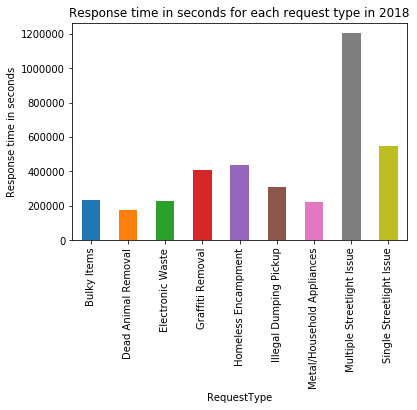

In [164]:
z=df.groupby('RequestType')['Response time in sec'].mean()
z.plot(kind='bar')
plt.ylabel('Response time in seconds')
plt.title('Response time in seconds for each request type in 2018')

In [165]:
a=df.groupby(['RequestType','ZipCode'])['Response time in sec'].mean()

In [166]:
df.groupby(['RequestType','ZipCode']).apply(lambda x: x.sort_values(['Response time in sec'], ascending=True))

CreatedDate  \
RequestType              ZipCode                               
Bulky Items              90001.0 97494   2018-11-23 23:48:01   
                                 97495   2018-11-23 23:47:02   
                                 61291   2018-12-04 23:34:25   
                                 572202  2018-07-10 23:13:04   
                                 692197  2018-06-05 22:52:19   
                                 434274  2018-08-16 22:29:37   
                                 383829  2018-08-30 22:26:15   
                                 383833  2018-08-30 22:23:33   
                                 643911  2018-06-19 22:02:23   
                                 31022   2018-12-13 21:12:35   
                                 782458  2018-05-08 21:03:25   
                                 774427  2018-05-10 20:54:45   
                                 293275  2018-09-25 20:26:02   
                                 485294  2018-08-02 20:21:45   
                                 537587  2018-07-19 20:21:00   
                                 635705  2018-06-21 20:09:46   
                                 889983  2018-04-05 20:01:42   
                                 889986  2018-04-05 19:58:45   
                                 644146  2018-06-19 19:57:42   
                                 1065918 2018-02-08 19:39:04   
                                 537668  2018-07-19 19:37:57   
                                 585582  2018-07-06 19:29:43   
                                 842099  2018-04-19 19:29:25   
                                 958611  2018-03-15 19:28:04   
                                 572569  2018-07-10 19:18:10   
                                 170811  2018-10-30 19:10:10   
                                 162800  2018-11-01 19:02:48   
                                 162803  2018-11-01 19:01:07   
                                 39040   2018-12-11 18:59:09   
                                 914573  2018-03-29 18:57:39   
...                                                      ...   
Single Streetlight Issue 91606.0 65436   2018-12-03 20:59:55   
                                 505040  2018-07-29 21:27:09   
                                 356036  2018-09-07 22:39:32   
                                 120743  2018-11-15 11:06:01   
                                 134060  2018-11-12 08:19:21   
                                 864868  2018-04-12 18:43:47   
                         91607.0 1084576 2018-02-04 10:40:12   
                                 1084578 2018-02-04 10:39:27   
                                 1084579 2018-02-04 10:38:42   
                                 1084585 2018-02-04 10:37:52   
                                 649935  2018-06-18 16:39:15   
                                 385852  2018-08-30 12:40:20   
                                 844704  2018-04-19 09:11:53   
                                 809997  2018-05-01 07:33:48   
                                 417466  2018-08-22 07:15:09   
                                 513017  2018-07-26 14:25:32   
                                 601778  2018-07-02 13:27:17   
                                 466163  2018-08-08 11:30:34   
                                 466268  2018-08-08 11:10:51   
                                 1097148 2018-01-30 16:42:57   
                                 1121948 2018-01-23 13:09:31   
                                 230795  2018-10-12 15:32:51   
                                 41191   2018-12-11 12:27:42   
                                 41202   2018-12-11 12:26:21   
                                 381380  2018-08-31 15:19:28   
                                 917596  2018-03-29 08:54:16   
                                 92466   2018-11-26 11:02:43   
                                 922592  2018-03-28 07:28:29   
                                 41159   2018-12-11 12:33:15   
                                 41169   2018-12-11 12:31:03   

                

Text(0.5, 1.0, 'Response time in seconds for each zipcode in 2018')

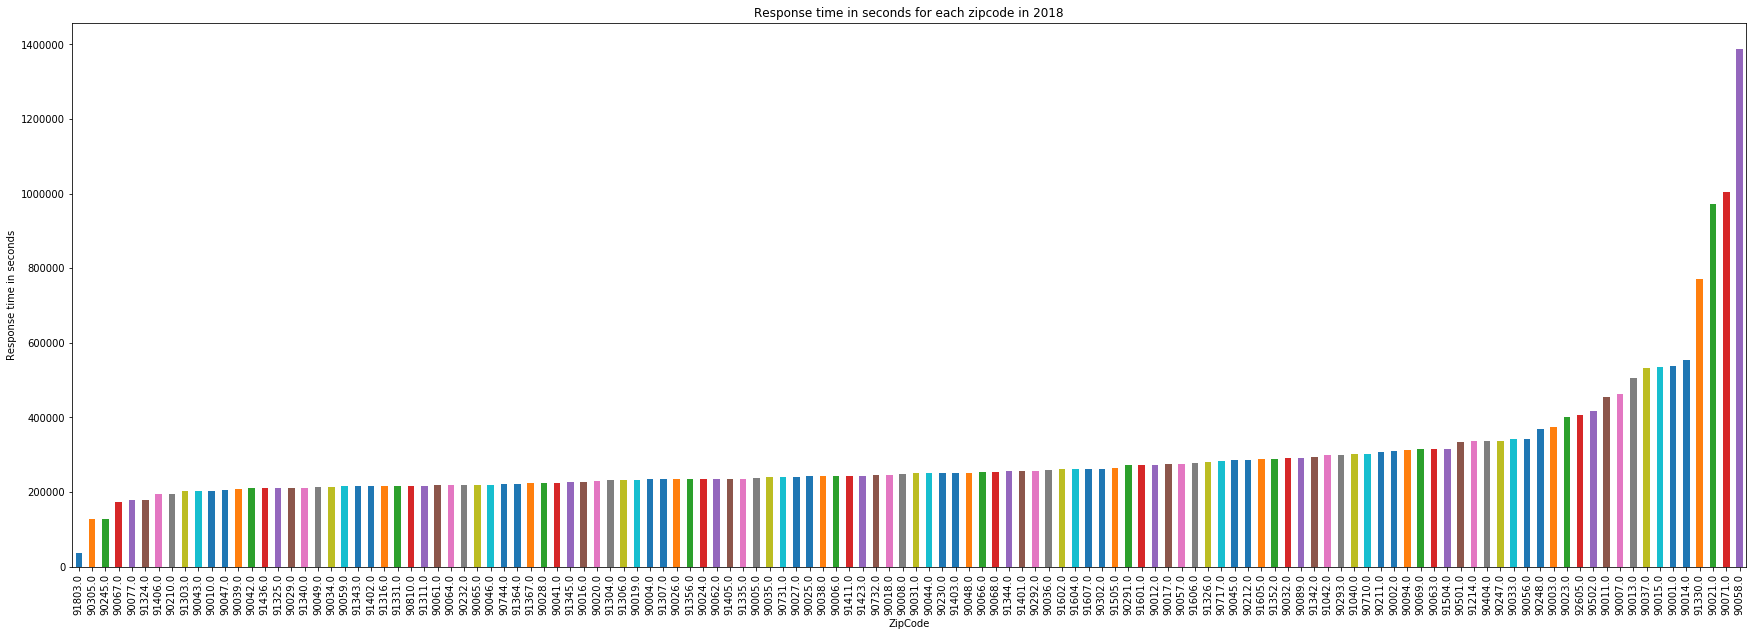

In [171]:
z=df.groupby('ZipCode')['Response time in sec'].mean().sort_values()
z.plot(kind='bar', figsize=(30,10))
plt.ylabel('Response time in seconds')
plt.title('Response time in seconds for each zipcode in 2018')

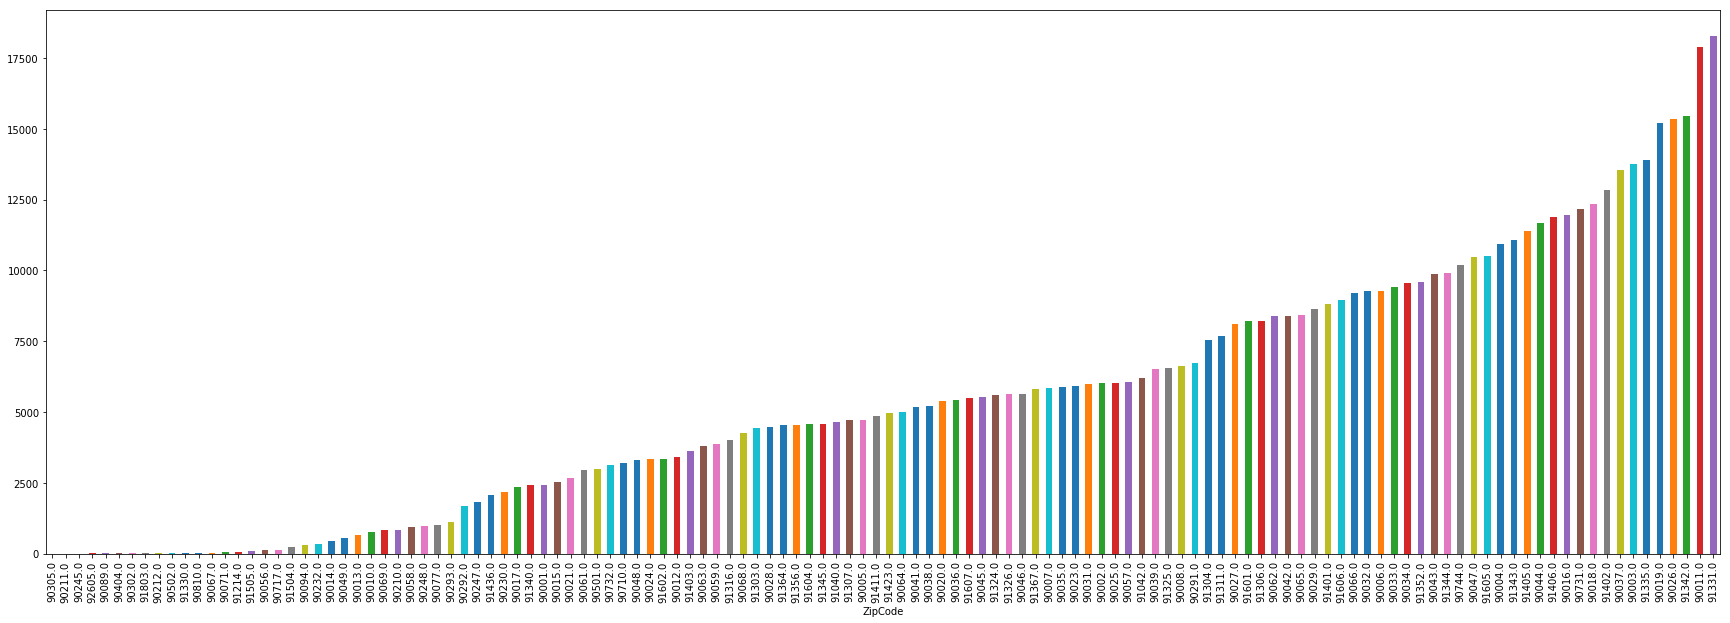

In [174]:
a=df.groupby('ZipCode')['RequestType'].count().sort_values()
a.plot(kind='bar', figsize=(30,10))

In [199]:
w=df.groupby(['ZipCode','RequestType']).count().reset_index()

In [205]:
q=w.iloc[:,:3]
new_q=q.rename(columns={"CreatedDate": "Total Request"})
new_q.sort_values(by='Total Request')

,ZipCode,RequestType,Total Request
911,91601.0,Dead Animal Removal,1
387,90057.0,Dead Animal Removal,1
527,90230.0,Single Streetlight Issue,1
906,91505.0,Homeless Encampment,1
73,90010.0,Multiple Streetlight Issue,1
94,90013.0,Dead Animal Removal,1
582,90404.0,Illegal Dumping Pickup,1
264,90035.0,Dead Animal Removal,1
488,90071.0,Metal/Household Appliances,1
581,90404.0,Homeless Encampment,1
